## Aim:
The aim of the project is to build a classifier to predict whether or not it will rain tomorrow in Australia by training a binary classification model using Logistic Regression.

# Dataset description
I have used the Rain in Australia data set downloaded from the Kaggle website.

I have downloaded this data set from the Kaggle website. The data set can be found at the following url:-

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

This dataset contains daily weather observations from numerous Australian weather stations.
The target variable RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset 

In [2]:
data = 'weatherAUS.csv'

df = pd.read_csv(data)

## Exploratory data analysis

In [3]:
# view shape of dataset

df.shape

(142193, 24)

In [4]:
# preview the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
# printing all column names
column_names = df.columns
column_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

## Drop RISK_MM variable
It is given in the dataset description, that we should drop the RISK_MM feature variable from the dataset description

In [6]:
df.drop(['RISK_MM'], axis=1, inplace=True)

# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Variables Types
Here I split the dataset into categorical and numerical variables. 
There are a mixture of categorical and numerical variables in the dataset. 
Categorical variables have data type object. Numerical variables have data type float64.

## Exploring Categorical Variables

I have made a subset only with categorical variables having datatype 'Object'

In [7]:
cat = [col_name for col_name in df.columns if df[col_name].dtype=='O']
cat

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
df[cat].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


**Summary of categorical variables**

There is a date variable. It is denoted by Date column.

There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.

There are two binary categorical variables - RainToday and RainTomorrow.

RainTomorrow is the target variable.

In [9]:
# check missing values in categorical variables

df[cat].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [10]:
cat_null = [var for var in cat if df[var].isnull().sum()!=0]
cat_null

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

We can see that there are only 4 categorical variables in the dataset which contains missing values. These are WindGustDir, WindDir9am, WindDir3pm and RainToday

In [11]:
# view frequency of categorical variables

for i in cat: 
    cat_count = df[i].value_counts()
    print(cat_count)

# view frequency distribution of categorical variables

for i in cat: 
    cat_count_freq = df[i].value_counts()/np.float(len(df))
    print(cat_count_freq)


2016-08-14    49
2013-06-02    49
2013-03-04    49
2017-04-27    49
2017-06-23    49
              ..
2008-01-01     1
2008-01-06     1
2008-01-19     1
2007-11-23     1
2008-01-26     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964

## Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [12]:
# check for cardinality in categorical variables

for i in cat:
    
    print(i, len(df[i].unique()))

Date 3436
Location 49
WindGustDir 17
WindDir9am 17
WindDir3pm 17
RainToday 3
RainTomorrow 2


## Feature Engineering of Date Variable

In [13]:
df['Date'].dtypes

dtype('O')

In [14]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# extract year from date

df['Year'] = df['Date'].dt.year

# extract month from date

df['Month'] = df['Date'].dt.month

# extract day from date

df['Day'] = df['Date'].dt.day


In [16]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [17]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [18]:
# preview the dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


## Explore Categorical Variables One by One

In [19]:
# check for missing values in categorical variables 
cat_new = [i for i in df.columns if df[i].dtype=='O']

df[cat_new].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

We can see that WindGustDir, WindDir9am, WindDir3pm, RainToday variables contain missing values. I will explore these variables one by one.

In [20]:
# print number of labels in Location variable

len(df.Location.unique())

49

In [21]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [22]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [23]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# print number of labels in WindGustDir variable

len(df['WindGustDir'].unique())

17

In [25]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [26]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [27]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN    9330
dtype: int64

From above output we can see that there are 9330 missing values in WindGustDir variable.

In [29]:
# print number of labels in WindDir9am variable

len(df['WindDir9am'].unique())

17

In [30]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [31]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [32]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7735
ESE     7558
N      11393
NE      7527
NNE     7948
NNW     7840
NW      8552
S       8493
SE      9162
SSE     8966
SSW     7448
SW      8237
W       8260
WNW     7194
WSW     6843
NaN    10013
dtype: int64

We can see that there are 10013 missing values in the WindDir9am variable.

In [34]:
# print number of labels in WindDir3pm variable

len(df['WindDir3pm'].unique())

17

In [35]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [36]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [37]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [38]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7724
ESE     8382
N       8667
NE      8164
NNE     6444
NNW     7733
NW      8468
S       9598
SE     10663
SSE     9142
SSW     8010
SW      9182
W       9911
WNW     8656
WSW     9329
NaN     3778
dtype: int64

There are 3778 missing values in the WindDir3pm variable.

In [39]:
# print number of labels in RainToday variable

len(df['RainToday'].unique())

3

In [40]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [41]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [42]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=False, dummy_na=True).head()

,No,Yes,NaN
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [43]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=False, dummy_na=True).sum(axis=0)

No     109332
Yes     31455
NaN      1406
dtype: int64

There are 1406 missing values in the RainToday variable.

## Exploring Numerical Variables

I have made a subset only with numerical variables having datatype 'float64'

In [44]:
# find numerical variables

num = [i for i in df.columns if df[i].dtype!='O']
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [45]:
# viewing the numerical variables

df[num].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


There are 16 numerical variables.

These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm.

All of the numerical variables are of continuous type.

## Exploring problems with Numerical Variables

### 1. Missing values in numerical variables

In [46]:
# checking missing values in numerical variables

df[num].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

### 2. Checking Outliers in Numerical Variables

In [47]:
# summary statistics in numerical variables
summary = df[num].describe()
summary
round(summary,3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,141556.000,141871.000,140787.000,81350.000,74377.000,132923.000,140845.000,139563.000,140419.000,138583.000,128179.000,128212.000,88536.000,85099.000,141289.000,139467.000,142193.000,142193.000,142193.000
mean,12.186,23.227,2.350,5.470,7.625,39.984,14.002,18.638,68.844,51.483,1017.654,1015.258,4.437,4.503,16.988,21.687,2012.759,6.403,15.715
std,6.403,7.118,8.465,4.189,3.782,13.589,8.893,8.803,19.051,20.798,7.105,7.037,2.887,2.721,6.493,6.938,2.541,3.427,8.798
min,-8.500,-4.800,0.000,0.000,0.000,6.000,0.000,0.000,0.000,0.000,980.500,977.100,0.000,0.000,-7.200,-5.400,2007.000,1.000,1.000
25%,7.600,17.900,0.000,2.600,4.900,31.000,7.000,13.000,57.000,37.000,1012.900,1010.400,1.000,2.000,12.300,16.600,2011.000,3.000,8.000
50%,12.000,22.600,0.000,4.800,8.500,39.000,13.000,19.000,70.000,52.000,1017.600,1015.200,5.000,5.000,16.700,21.100,2013.000,6.000,16.000
75%,16.800,28.200,0.800,7.400,10.600,48.000,19.000,24.000,83.000,66.000,1022.400,1020.000,7.000,7.000,21.600,26.400,2015.000,9.000,23.000
max,33.900,48.100,371.000,145.000,14.500,135.000,130.000,87.000,100.000,100.000,1041.000,1039.600,9.000,9.000,40.200,46.700,2017.000,12.000,31.000


From above, we can see that the Rainfall, Evaporation, WindGustSpeed, WindSpeed9am and WindSpeed3pm columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'WindSpeed3pm')

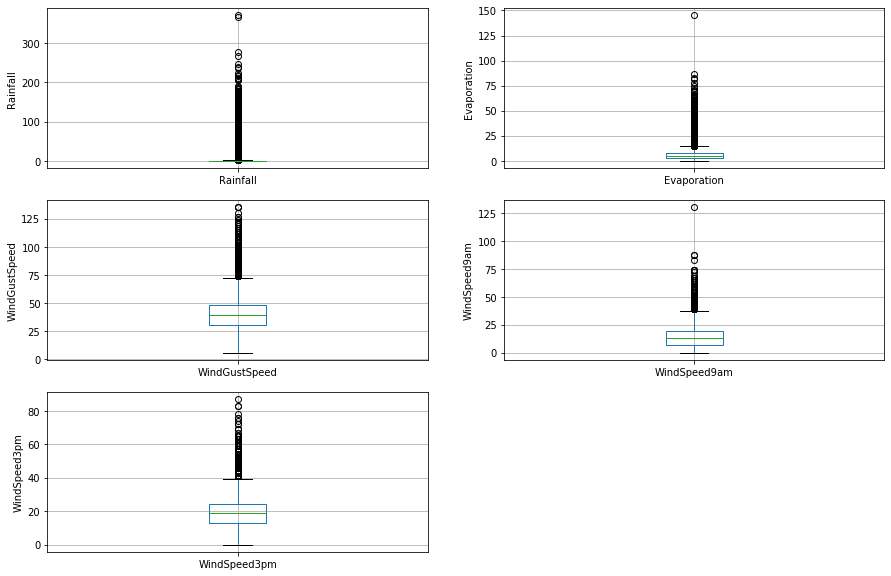

In [48]:
plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(3, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(3, 2, 3)
fig = df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(3, 2, 4)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(3, 2, 5)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

### Check the distribution of variables
Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

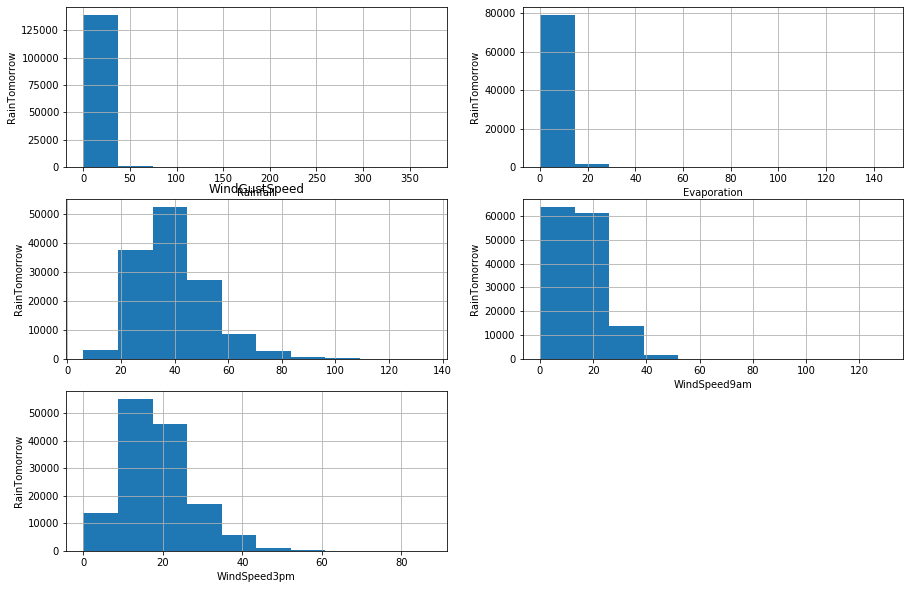

In [49]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(3, 2, 3)
fig = df.WindGustSpeed.hist(bins=10)
fig.set_title('WindGustSpeed')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 4)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 5)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

We can see that all the five variables are skewed. So, I will use interquantile range to find outliers

In [50]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print (Lower_fence) 
print(Upper_fence)

-2.4000000000000004
3.2


For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [51]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print (Lower_fence) 
print(Upper_fence)

-11.800000000000002
21.800000000000004


For Evaporation, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [52]:
# find outliers for WindGustSpeed variable

IQR = df.WindGustSpeed.quantile(0.75) - df.WindGustSpeed.quantile(0.25)
Lower_fence = df.WindGustSpeed.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindGustSpeed.quantile(0.75) + (IQR * 3)
print (Lower_fence) 
print(Upper_fence)

-20.0
99.0


For WindGustSpeed, the minimum and maximum values are 6.0 and 135.0. So, the outliers are values > 99.0.

In [53]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print (Lower_fence) 
print(Upper_fence)

-29.0
55.0


For WindSpeed9am, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [54]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print (Lower_fence) 
print(Upper_fence)

-20.0
57.0


For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

## Declaring feature vector and target variable

In [55]:
x = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

## Spliting dataset into separate training and test dataset

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Feature Engineering
Here I will transform raw data into useful features that will be helpful to understand the model better and increase its predictive power.

First, I will display the categorical and numerical variables again separately.

In [57]:
# check data types in X_train

x_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [58]:
# displaying categorical variables

cat_new = [i for i in x_train.columns if x_train[i].dtypes == 'O']
cat_new

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [59]:
# displaying numerical variables

num_new = [i for i in x_train.columns if x_train[i].dtypes != 'O']
num_new

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [60]:
# checking missing values in numerical variables in x_train

x_train[num_new].isnull().sum()

MinTemp            455
MaxTemp            254
Rainfall          1057
Evaporation      45660
Sunshine         50942
WindGustSpeed     6911
WindSpeed9am      1011
WindSpeed3pm      1978
Humidity9am       1344
Humidity3pm       2720
Pressure9am      10546
Pressure3pm      10519
Cloud9am         40414
Cloud3pm         42932
Temp9am            689
Temp3pm           2057
Year                 0
Month                0
Day                  0
dtype: int64

In [61]:
# checking missing values in numerical variables in x_test

x_test[num_new].isnull().sum()

MinTemp            182
MaxTemp             68
Rainfall           349
Evaporation      15183
Sunshine         16874
WindGustSpeed     2359
WindSpeed9am       337
WindSpeed3pm       652
Humidity9am        430
Humidity3pm        890
Pressure9am       3468
Pressure3pm       3462
Cloud9am         13243
Cloud3pm         14162
Temp9am            215
Temp3pm            669
Year                 0
Month                0
Day                  0
dtype: int64

In [62]:
# printing percentage of missing values in the numerical variables in training dataset

for i in num_new:
    if x_train[i].isnull().mean()>0:
        print(i, round(x_train[i].isnull().mean(),4))

MinTemp 0.0043
MaxTemp 0.0024
Rainfall 0.0099
Evaporation 0.4282
Sunshine 0.4777
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0185
Humidity9am 0.0126
Humidity3pm 0.0255
Pressure9am 0.0989
Pressure3pm 0.0986
Cloud9am 0.379
Cloud3pm 0.4026
Temp9am 0.0065
Temp3pm 0.0193


## Assumption

I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set to avoid overfitting.

In [63]:
# impute missing values in x_train and x_test with respective column median in x_train

for i in [x_train, x_test]:
    for j in num_new:
        col_med=x_train[j].median()
        i[j].fillna(col_med, inplace=True)

C:\Users\pooja\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [64]:
# checking again missing values in numerical variables in x_train

x_train[num_new].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [65]:
# checking missing values in numerical variables in x_test

x_test[num_new].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [66]:
# printing percentage of missing values in the categorical variables in training set

x_train[cat_new].isnull().mean()

Location       0.000000
WindGustDir    0.065151
WindDir9am     0.070046
WindDir3pm     0.026556
RainToday      0.009911
dtype: float64

In [67]:
# imputing missing categorical variables with most frequent value i.e mode

for i in [x_train, x_test]:
    i['WindGustDir'].fillna(x_train['WindGustDir'].mode()[0], inplace=True)
    i['WindDir9am'].fillna(x_train['WindDir9am'].mode()[0], inplace=True)
    i['WindDir3pm'].fillna(x_train['WindDir3pm'].mode()[0], inplace=True)
    i['RainToday'].fillna(x_train['RainToday'].mode()[0], inplace=True)

In [68]:
# checking missing values in categorical variables in x_train

x_train[cat_new].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [69]:
# checking missing values in categorical variables in x_test

x_test[cat_new].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### Engineering outliers in numerical variables

We have seen that the Rainfall, Evaporation, WindGustSpeed, WindSpeed9am and WindSpeed3pm columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [70]:
def max_value(temp, variable, top):
    return np.where(temp[variable]>top, top, temp[variable])

In [71]:
for i in [x_train, x_test]:
    i['Rainfall'] = max_value(i, 'Rainfall', 3.2)
    i['Evaporation'] = max_value(i, 'Evaporation', 21.8)
    i['WindGustSpeed'] = max_value(i, 'WindGustSpeed', 99)
    i['WindSpeed9am'] = max_value(i, 'WindSpeed9am', 55)
    i['WindSpeed3pm'] = max_value(i, 'WindSpeed3pm', 57)

C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [72]:
x_train.Rainfall.max(), x_test.Rainfall.max()

(3.2, 3.2)

In [73]:
x_train.Evaporation.max(), x_test.Evaporation.max()

(21.8, 21.8)

In [74]:
x_train.WindGustSpeed.max(), x_test.WindGustSpeed.max()

(99.0, 99.0)

In [75]:
x_train.WindSpeed9am.max(), x_test.WindSpeed9am.max()

(55.0, 55.0)

In [76]:
x_train.WindSpeed3pm.max(), x_test.WindSpeed3pm.max()

(57.0, 57.0)

In [77]:
x_train[num_new].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000
mean,12.189536,23.232633,0.675914,5.153070,8.040874,39.875539,13.986675,18.618310,68.866631,51.493896,1017.639133,1015.240462,4.652142,4.702187,16.989299,21.684152,2012.760915,6.403998,15.716449
std,6.391916,7.093944,1.184554,2.826021,2.768440,13.080218,8.809379,8.685456,18.946126,20.519879,6.736640,6.675946,2.292034,2.117648,6.465550,6.855094,2.541083,3.428233,8.796052
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,99.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


We can now see that the outliers in Rainfall, Evaporation, WindGustSpeed, WindSpeed9am and WindSpeed3pm columns are capped.

## Encoding categorical variables

In [78]:
cat_new

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [79]:
x_train[cat_new].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
12826,Moree,NNE,NE,NE,No
32391,Sydney,ESE,WNW,SE,No
185,Albury,W,NNE,W,No
36029,WaggaWagga,NE,ESE,NE,No
14020,Moree,SW,SSW,SW,No


In [80]:
# encoding RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [81]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
12826,Moree,7.7,21.9,0.0,4.6,11.0,NNE,41.0,NE,NE,...,1024.8,3.0,2.0,16.1,21.5,0,1,2011,9,4
32391,Sydney,16.0,25.0,0.4,1.2,9.5,ESE,26.0,WNW,SE,...,1018.8,2.0,7.0,19.3,24.0,0,1,2016,4,9
185,Albury,2.8,16.1,0.0,4.8,8.5,W,20.0,NNE,W,...,1015.1,5.0,5.0,7.6,15.6,0,1,2009,6,5
36029,WaggaWagga,2.7,15.7,0.0,0.8,8.0,NE,31.0,ESE,NE,...,1023.7,1.0,6.0,6.9,14.9,0,1,2009,7,10
14020,Moree,7.6,16.3,0.8,1.8,8.6,SW,44.0,SSW,SW,...,1019.3,7.0,2.0,8.5,15.8,0,1,2015,6,1


We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.

Now, I will create the x_train training set.

In [82]:
x_train = pd.concat([x_train[num_new], x_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_train.Location), 
                     pd.get_dummies(x_train.WindGustDir),
                     pd.get_dummies(x_train.WindDir9am),
                     pd.get_dummies(x_train.WindDir3pm)], axis=1)

In [83]:
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
12826,7.7,21.9,0.0,4.6,11.0,41.0,30.0,11.0,70.0,52.0,...,0,0,0,0,0,0,0,0,0,0
32391,16.0,25.0,0.4,1.2,9.5,26.0,17.0,15.0,65.0,57.0,...,0,0,0,1,0,0,0,0,0,0
185,2.8,16.1,0.0,4.8,8.5,20.0,4.0,11.0,86.0,57.0,...,0,0,0,0,0,0,0,1,0,0
36029,2.7,15.7,0.0,0.8,8.0,31.0,13.0,17.0,78.0,58.0,...,0,0,0,0,0,0,0,0,0,0
14020,7.6,16.3,0.8,1.8,8.6,44.0,11.0,28.0,96.0,58.0,...,0,0,0,0,0,0,1,0,0,0


Similarly, I will create the x_test testing set.

In [84]:
x_test = pd.concat([x_test[num_new], x_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_test.Location), 
                     pd.get_dummies(x_test.WindGustDir),
                     pd.get_dummies(x_test.WindDir9am),
                     pd.get_dummies(x_test.WindDir3pm)], axis=1)

In [85]:
x_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
86232,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
57576,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,0,1,0,0,0,0,0,0,0
124071,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,1,0,0,0,0,0
117955,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,0,1,0,0,0
133468,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale.

## Feature Scaling

In [86]:
x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,...,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000
mean,12.189536,23.232633,0.675914,5.153070,8.040874,39.875539,13.986675,18.618310,68.866631,51.493896,...,0.054452,0.060135,0.067139,0.101778,0.064214,0.056665,0.064354,0.069240,0.060425,0.065339
std,6.391916,7.093944,1.184554,2.826021,2.768440,13.080218,8.809379,8.685456,18.946126,20.519879,...,0.226909,0.237737,0.250264,0.302357,0.245134,0.231203,0.245384,0.253863,0.238274,0.247124
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,99.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
cols = x_train.columns

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [89]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [90]:
x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,...,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000
mean,0.484312,0.529917,0.211223,0.236379,0.554543,0.364253,0.254303,0.326637,0.688666,0.514939,...,0.054452,0.060135,0.067139,0.101778,0.064214,0.056665,0.064354,0.069240,0.060425,0.065339
std,0.151827,0.134101,0.370173,0.129634,0.190927,0.140648,0.160171,0.152376,0.189461,0.205199,...,0.226909,0.237737,0.250264,0.302357,0.245134,0.231203,0.245384,0.253863,0.238274,0.247124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.268817,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.220183,0.586207,0.354839,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.187500,0.247706,0.600000,0.430108,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model training

In [91]:
# training a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Results Prediction 

In [92]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [93]:
# probability of getting output as 0 - no rain 

y_pred_test_prob_0 = logreg.predict_proba(x_test)[:,0]
y_pred_test_prob_0

array([0.91544401, 0.83230365, 0.82101389, ..., 0.93627808, 0.60517367,
       0.54302583])

In [94]:
# probability of getting output as 1 - rain 

y_pred_test_prob_1 = logreg.predict_proba(x_test)[:,1]
y_pred_test_prob_1

array([0.08455599, 0.16769635, 0.17898611, ..., 0.06372192, 0.39482633,
       0.45697417])

## Model accuracy score

In [95]:
from sklearn.metrics import accuracy_score

model_accuracy_test = accuracy_score(y_test, y_pred_test)
model_accuracy_test

0.850600579481842

## Comparing the training-set and test-set accuracy

In [96]:
y_pred_train = logreg.predict(x_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [97]:
model_accuracy_train = accuracy_score(y_train, y_pred_train)
model_accuracy_train

0.8473519372866735

The training-set accuracy score is 0.8474 while the test-set accuracy to be 0.8506. 
These two values are almost equal. Hence, there is no overfitting.

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

I will increase C to 100 and fit a more flexible model.

In [98]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg_100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg_100.fit(x_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
logreg_100.score(x_train, y_train)

0.8475019691684483

In [100]:
logreg_100.score(x_test, y_test)

0.8505443191088357

 if we use more regularized model by setting C=100, then training set accuracy increases slightly but test set accuracy decreases relative to the default parameters.

In [101]:
# fit the Logsitic Regression model with C=0.01

# instantiate the model
logreg_001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg_001.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
logreg_001.score(x_train, y_train)

0.8415850868309516

In [103]:
logreg_001.score(x_test, y_test)

0.8439337252805986

 if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relative to the default parameters.

## Comparing model accuracy with null accuracy

In [104]:
# checking class distribution in test set

y_test.value_counts()

No     27543
Yes     8006
Name: RainTomorrow, dtype: int64

In [105]:
# calculating null accuracy score

null_accuracy = (27543/(27543+8006))
null_accuracy

0.7747897268558891

We can see that our **model accuracy score** is **0.8506** but **null accuracy score** is **0.7748**. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

## Confusion matrix

In [106]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[26081,  1462],
       [ 3849,  4157]], dtype=int64)

True Positives(TP) =  26081

True Negatives(TN) =  4157

False Positives(FP) =  1462

False Negatives(FN) =  3849

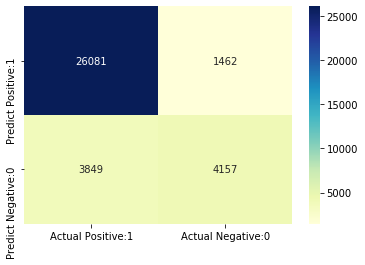

In [107]:
# visualize confusion matrix with seaborn heatmap

cm_plot = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_plot, annot=True, fmt='d', cmap='YlGnBu')

## Classification Report

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

          No       0.87      0.95      0.91     27543
         Yes       0.74      0.52      0.61      8006

    accuracy                           0.85     35549
   macro avg       0.81      0.73      0.76     35549
weighted avg       0.84      0.85      0.84     35549



In [109]:

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [110]:
# calculating classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_accuracy

0.850600579481842

In [111]:
# calculating classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
classification_error

0.14939942051815805

In [112]:
# calculating precision score

precision = TP / float(TP + FP)
precision

0.9469193624514396

In [113]:
# calculating recall 

recall = TP / float(TP + FN)
recall

0.8713999331774139

## Adjusting the threshold level

In [114]:
y_pred_prob = logreg.predict_proba(x_test)

y_pred_prob

array([[0.91544401, 0.08455599],
       [0.83230365, 0.16769635],
       [0.82101389, 0.17898611],
       ...,
       [0.93627808, 0.06372192],
       [0.60517367, 0.39482633],
       [0.54302583, 0.45697417]])

In [115]:
# storing the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probability of - No rain tomorrow (0)', 'Probability of - Rain tomorrow (1)'])

y_pred_prob_df

,Probability of - No rain tomorrow (0),Probability of - Rain tomorrow (1)
0,0.915444,0.084556
1,0.832304,0.167696
2,0.821014,0.178986
3,0.990340,0.009660
4,0.955529,0.044471
...,...,...
35544,0.307130,0.692870
35545,0.703905,0.296095
35546,0.936278,0.063722
35547,0.605174,0.394826


In [116]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(x_test)[:, 1]
len(y_pred1)

35549

Text(0, 0.5, 'Frequency')

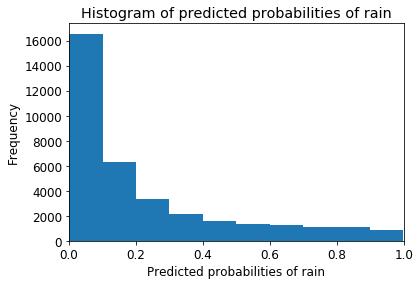

In [117]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

### Observations
We can see that the above histogram is highly positive skewed.
The first column tell us that there are approximately 17000 observations with probability between 0.0 and 0.1.
There are small number of observations with probability > 0.5.
So, these small number of observations predict that there will be rain tomorrow.
Majority of observations predict that there will be no rain tomorrow.

##  ROC - AUC

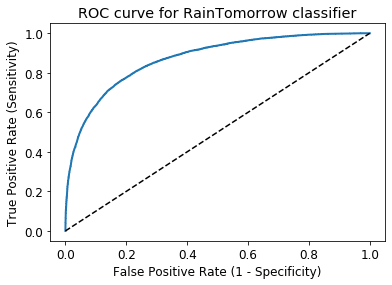

In [118]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [119]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
ROC_AUC

0.8716616696429136

In [120]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, x_train, y_train, cv=5, scoring='roc_auc').mean()
Cross_validated_ROC_AUC

0.8697297392987544

## Model evaluation and improvement

Below are the three techniques to improve the model performance.
1. Recursive feature elimination
2. k-fold cross validation
3. hyperparameter optimization using GridSearchCV.

### 1. Recursive Feature Elimination with Cross Validation

In [121]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(x_train, y_train)

In [122]:
rfecv.n_features_

103

In [123]:
# transform the training data

x_train_rfecv = rfecv.transform(x_train)


# train classifier

logreg.fit(x_train_rfecv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
# test classifier on test data

x_test_rfecv = rfecv.transform(x_test)

y_pred_rfecv = logreg.predict(x_test_rfecv)

In [125]:
classifier_score = logreg.score(x_test_rfecv,y_test)
classifier_score

0.8500942361247855

In [126]:
from sklearn.metrics import confusion_matrix

cm_new = confusion_matrix(y_test, y_pred_rfecv)
cm_new

array([[26067,  1476],
       [ 3853,  4153]], dtype=int64)

True Positives(TP1) =  26067

True Negatives(TN1) =  4153

False Positives(FP1) =  1476

False Negatives(FN1) =  3853

We can see that in the original model, we have FP = 1462 whereas FP1 = 1476. So, we get approximately higher number of false positives. Also, FN = 3849 whereas FN1 = 3853. So, we get slightly higher false negatives.

### 2. k-Fold Cross Validation

In [127]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores_new = cross_val_score(logreg, x_train, y_train, cv = 5, scoring='accuracy')

scores_new

array([0.84574992, 0.8451873 , 0.8476253 , 0.85020395, 0.84733683])

In [128]:
scores_new.mean()

0.8472206604794806

Our, original model score is found to be 0.8474. The average cross-validation score is 0.8472. So, we can conclude that cross-validation does not result in performance improvement.

### 3. Hyperparameter Optimization using GridSearch CV

In [129]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [130]:
# examine the best model

# best score achieved during the GridSearchCV
best_score = grid_search.best_score_
print (best_score)

# print parameters that give the best results
best_param = grid_search.best_params_
print(best_param)
# print estimator that was chosen by the GridSearch
best_estimator = grid_search.best_estimator_
print(best_estimator)

0.8474457083901527
{'C': 10}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [131]:
# calculate GridSearch CV score on test set

gscv_score = grid_search.score(x_test, y_test)
gscv_score

0.850600579481842

Our original model test accuracy is 0.8506 while GridSearch CV accuracy is also 0.8506.

## Results and Conclusion

1. The logistic regression model accuracy score is 0.8506. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

2. Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

3. The model shows no signs of overfitting.

4. Increasing the value of C results in increase in training set accuracy but test set accuracy decreases relative to the default parameters

5. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

6. Our original model accuracy score is 0.8506 whereas accuracy score after RFECV is 0.8501. So, we can obtain approximately similar accuracy but with reduced set of features.

7. We can see that in the original model, we have FP = 1462 whereas FP1 = 1476. So, we get approximately higher number of false positives. Also, FN = 3849 whereas FN1 = 3853. So, we get slightly higher false negatives.

8. Our, original model score is found to be 0.8474. The average cross-validation score is 0.8472. So, we can conclude that cross-validation does not result in performance improvement.

9. Our original model test accuracy is 0.8506 while GridSearch CV accuracy is 0.8506. We can see that GridSearch CV does not affect the performance for this particular model.